In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
base_ts = np.zeros((5,100))
base_ts[0, 0:5] = 1
base_ts[1, 20:25] = 1
base_ts[2, 40:45] = 1
base_ts[3, 60:65] = 1
base_ts[4, 80:85] = 1

n_samples = 8000
n_var = 5

base_dataset = np.zeros((n_samples, 5, 100))
base_dataset_label = np.zeros((n_samples))
for i in range(n_samples):
    base_dataset[i] = base_ts + np.random.normal(0, 0.05, (5, 100))

base_two_ts = np.zeros((5,100))
base_two_ts[0, 0:5] = 1
base_two_ts[0, 40:45] = 1
base_two_ts[1, 20:25] = 1
base_two_ts[1, 60:65] = 1
base_two_ts[2, 40:45] = 1
base_two_ts[2, 80:85] = 1
base_two_ts[3, 60:65] = 1
base_two_ts[3, 0:5] = 1
base_two_ts[4, 80:85] = 1
base_two_ts[4, 20:25] = 1

base_two_dataset = np.zeros((n_samples, 5, 100))
base_two_dataset_label = np.ones((n_samples))
for i in range(n_samples):
    base_two_dataset[i] = base_two_ts + np.random.normal(0, 0.05, (5, 100))

base_three_ts = np.zeros((5,100))
base_three_ts[0, 0:5] = 1
base_three_ts[0, 40:45] = 1
base_three_ts[0, 80:85] = 1
base_three_ts[1, 20:25] = 1
base_three_ts[1, 60:65] = 1
base_three_ts[1, 0:5] = 1
base_three_ts[2, 40:45] = 1
base_three_ts[2, 80:85] = 1
base_three_ts[2, 20:25] = 1
base_three_ts[3, 60:65] = 1
base_three_ts[3, 20:25] = 1
base_three_ts[3, 40:45] = 1
base_three_ts[4, 80:85] = 1
base_three_ts[4, 20:25] = 1
base_three_ts[4, 60:65] = 1

base_three_dataset = np.zeros((n_samples, 5, 100))
base_three_dataset_label = np.ones((n_samples)) * 2
for i in range(n_samples):
    base_three_dataset[i] = base_three_ts + np.random.normal(0, 0.05, (5, 100))

dataset = np.concatenate((base_dataset, base_two_dataset, base_three_dataset), axis=0)
dataset_label = np.concatenate((base_dataset_label, base_two_dataset_label, base_three_dataset_label), axis=0)

#Suffle dataset
dataset, dataset_label = shuffle(dataset, dataset_label)
X_train = dataset[:int(n_samples*3*0.6)]
y_train = dataset_label[:int(n_samples*3*0.6)]
X_val = dataset[int(n_samples*3*0.6):int(n_samples*3*0.8)]
y_val = dataset_label[int(n_samples*3*0.6):int(n_samples*3*0.8)]
X_test = dataset[int(n_samples*3*0.8):]
y_test = dataset_label[int(n_samples*3*0.8):]

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

np.save('data/Dirac/x_train_2020.npy', X_train)
np.save('data/Dirac/y_train_2020.npy', y_train)
np.save('data/Dirac/x_valid_2020.npy', X_val)
np.save('data/Dirac/y_valid_2020.npy', y_val)
np.save('data/Dirac/x_test_2020.npy', X_test)
np.save('data/Dirac/y_test_2020.npy', y_test)

(14400, 5, 100) (14400,)
(4800, 5, 100) (4800,)
(4800, 5, 100) (4800,)


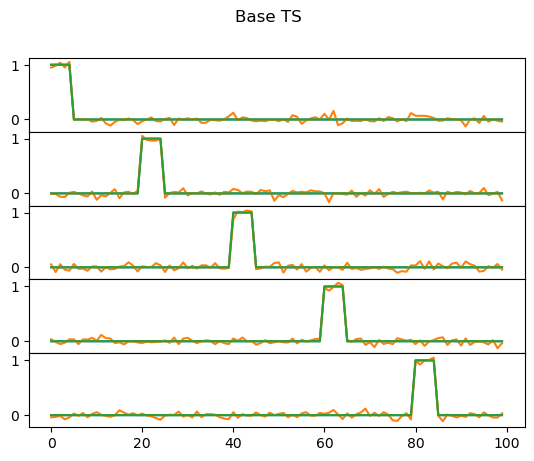

In [3]:
fig = plt.figure(n_var)
gs = fig.add_gridspec(n_var,hspace=0)
axs = gs.subplots(sharey=True)
plt.suptitle("Base TS")
for i in range(n_var):
    axs[i].plot(base_ts[i])
    axs[i].plot(base_dataset[0, i])
    axs[i].plot(np.mean(base_dataset[:, i], axis=0))
plt.show()

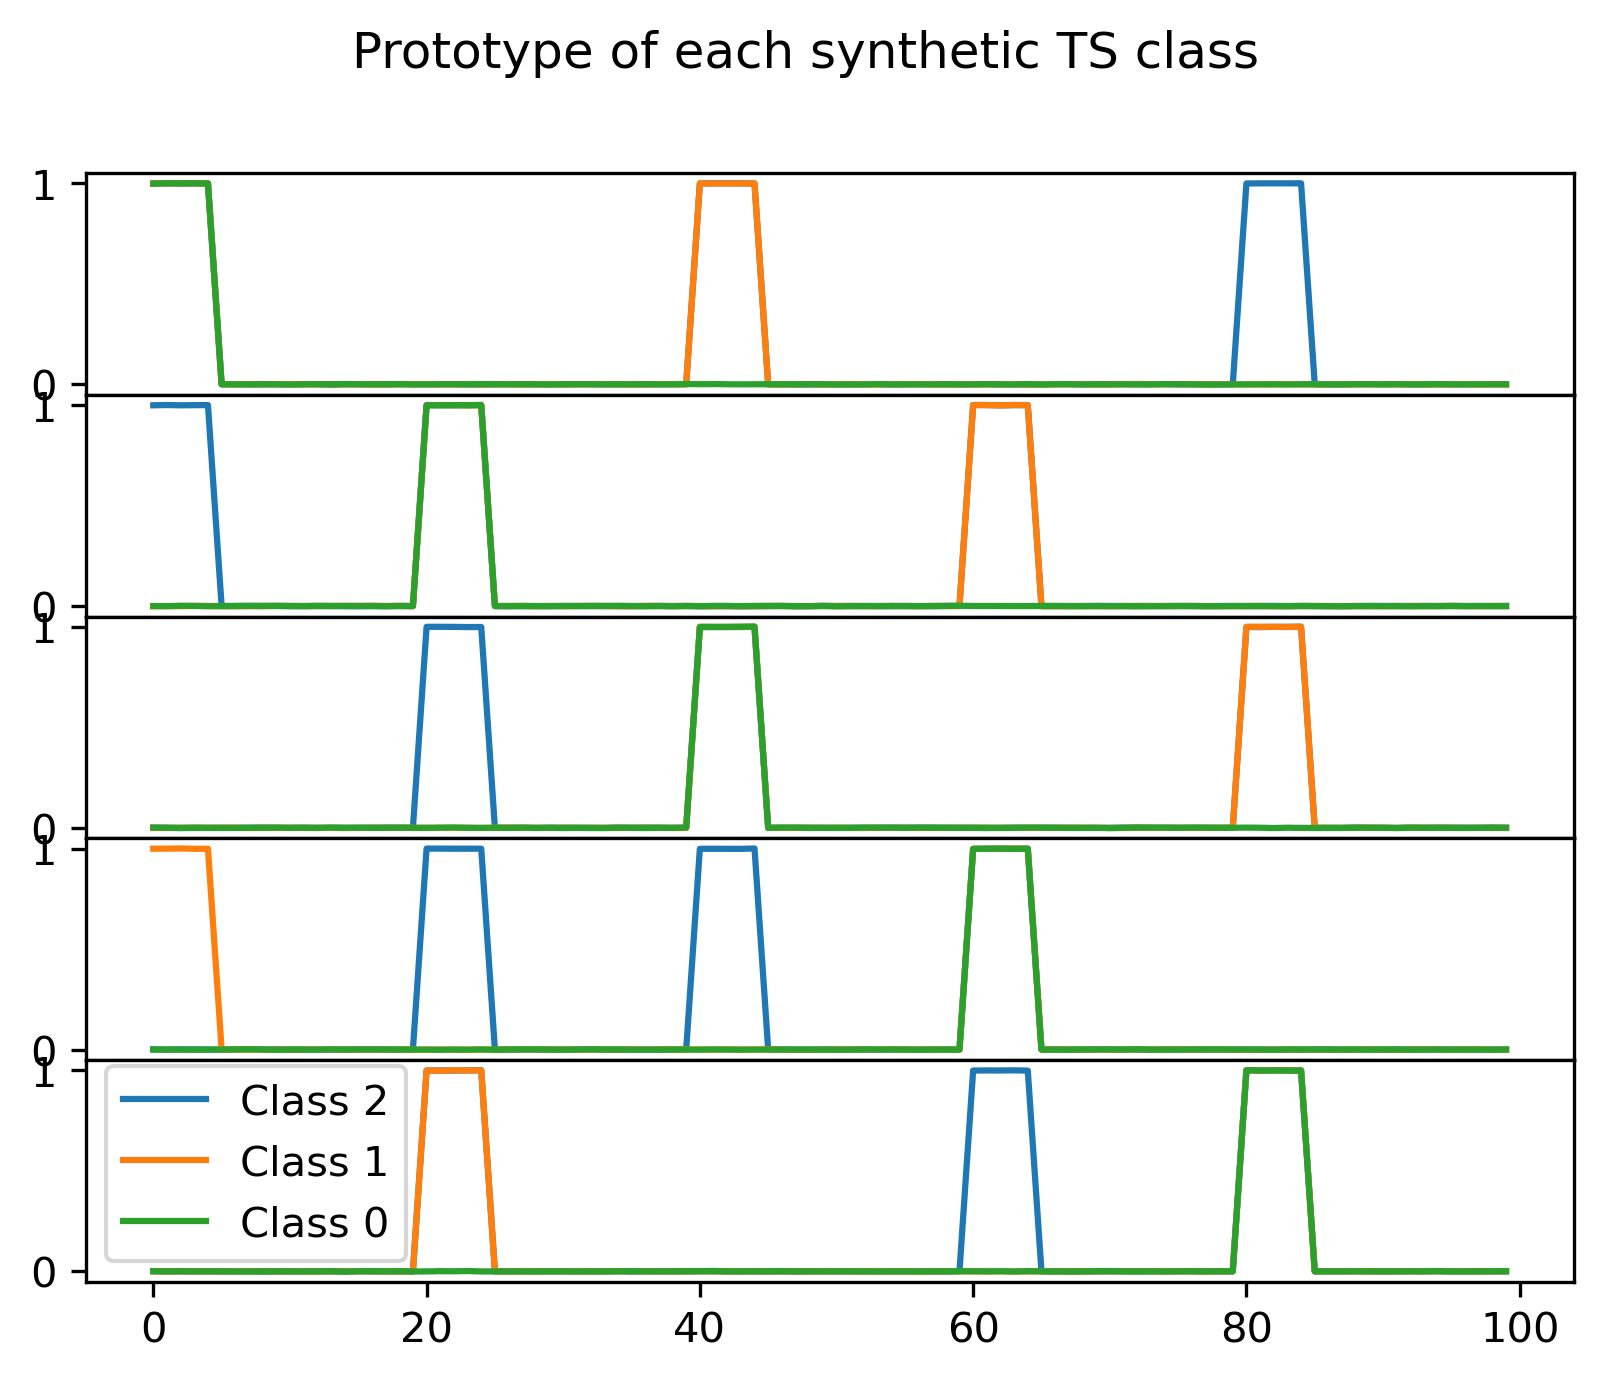

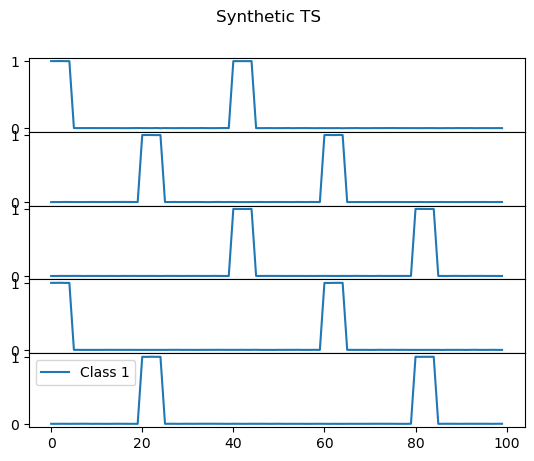

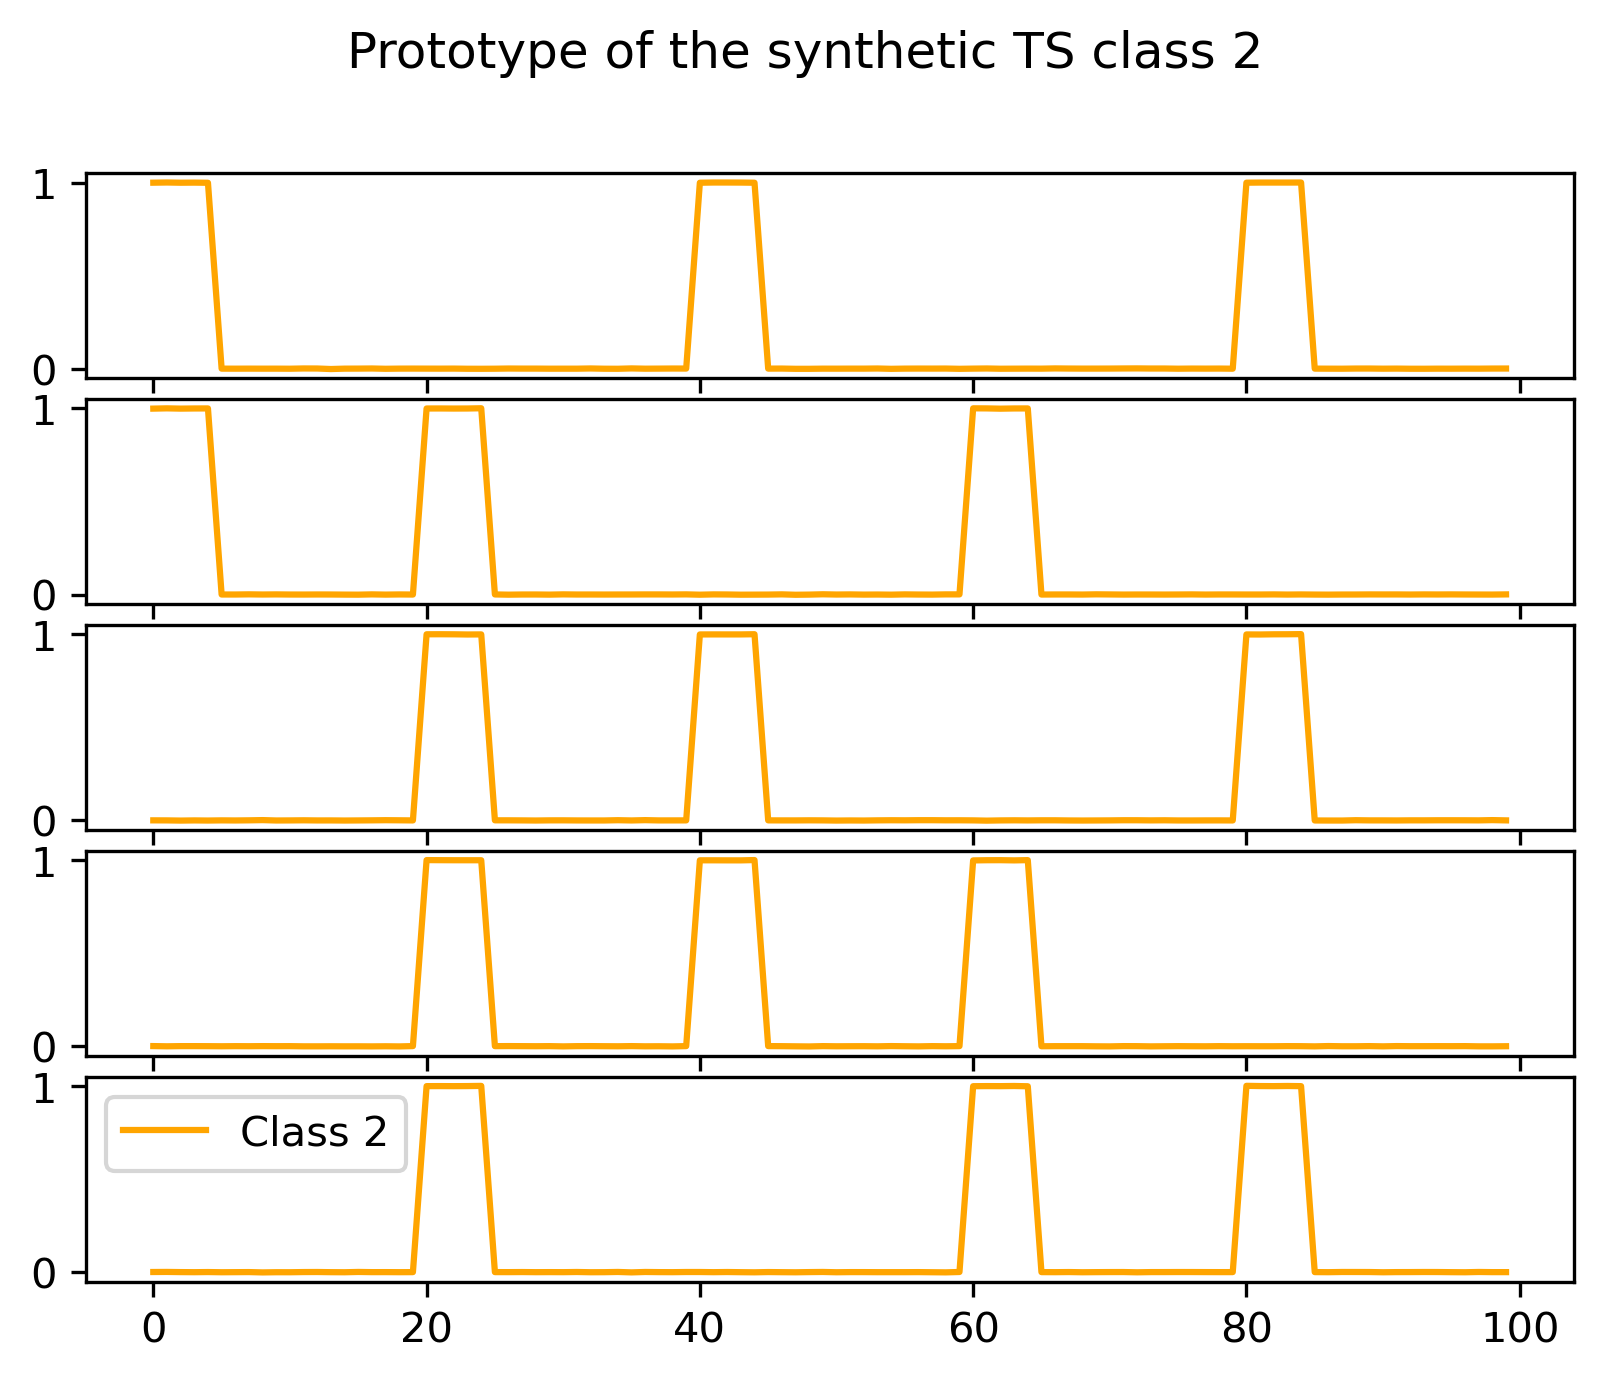

In [6]:
fig = plt.figure(n_var, dpi=300)
gs = fig.add_gridspec(n_var,hspace=0)
axs = gs.subplots(sharey=True)
plt.suptitle("Prototype of each synthetic TS class")
for i in range(n_var):
    #axs[i].plot(base_ts[i])
    #axs[i].plot(base_dataset[0, i])
    axs[i].plot(np.mean(base_three_dataset[:, i], axis=0), label="Class 2")
    axs[i].plot(np.mean(base_two_dataset[:, i], axis=0), label="Class 1")
    axs[i].plot(np.mean(base_dataset[:, i], axis=0), label="Class 0")
    #plot std of class 0
    #axs[i].fill_between(range(100), np.mean(base_dataset[:, i], axis=0) - np.std(base_dataset[:, i], axis=0), np.mean(base_dataset[:, i], axis=0) + np.std(base_dataset[:, i], axis=0), alpha=0.5)

plt.legend()
plt.savefig("img/prototype.png")
plt.show()


fig = plt.figure(n_var)
gs = fig.add_gridspec(n_var,hspace=0)
axs = gs.subplots(sharey=True)
plt.suptitle("Synthetic TS")
for i in range(n_var):
    #axs[i].plot(base_ts[i])
    #axs[i].plot(base_dataset[0, i])
    axs[i].plot(np.mean(base_two_dataset[:, i], axis=0), label="Class 1")
plt.legend()
plt.show()

fig = plt.figure(n_var, dpi=300)
gs = fig.add_gridspec(n_var,hspace=0.1)
axs = gs.subplots(sharey=True)
plt.suptitle("Prototype of the synthetic TS class 2")
for i in range(n_var):
    #axs[i].plot(base_ts[i])
    #axs[i].plot(base_dataset[0, i])
    axs[i].plot(np.mean(base_three_dataset[:, i], axis=0), label="Class 2", color='orange')
plt.savefig("img/prototype_class_2.png")
plt.legend()
plt.show()
#axs[i].plot(np.mean(base_two_dataset[:, i], axis=0), label="Class 1")
#axs[i].plot(np.mean(base_three_dataset[:, i], axis=0), label="Class 2")


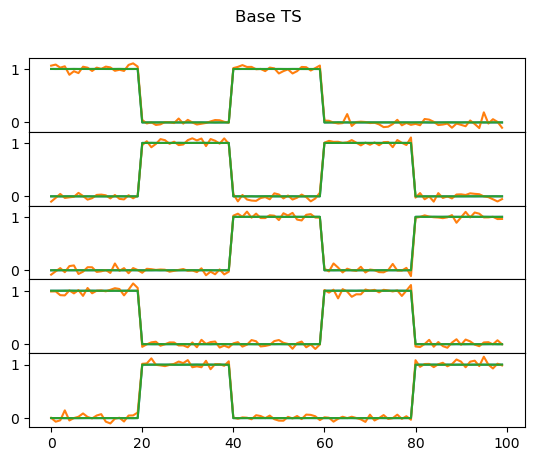

In [4]:
fig = plt.figure(n_var)
gs = fig.add_gridspec(n_var,hspace=0)
axs = gs.subplots(sharey=True)
plt.suptitle("Base TS")
for i in range(n_var):
    axs[i].plot(base_two_ts[i])
    axs[i].plot(base_two_dataset[0, i])
    axs[i].plot(np.mean(base_two_dataset[:, i], axis=0))
plt.show()

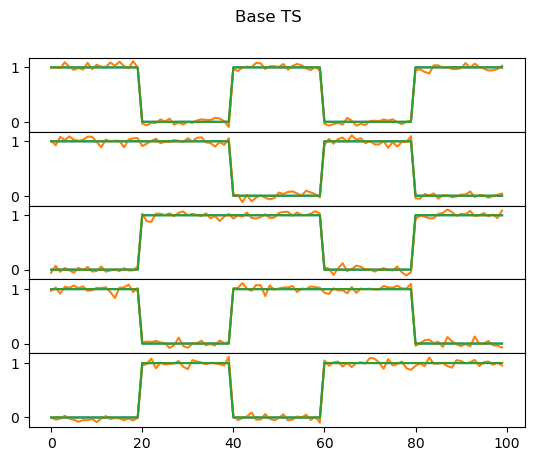

In [5]:
fig = plt.figure(n_var)
gs = fig.add_gridspec(n_var,hspace=0)
axs = gs.subplots(sharey=True)
plt.suptitle("Base TS")
for i in range(n_var):
    axs[i].plot(base_three_ts[i])
    axs[i].plot(base_three_dataset[0, i])
    axs[i].plot(np.mean(base_three_dataset[:, i], axis=0))

In [12]:
n_samples = 4000
n_var = 3
n_timesteps = 100

base_ts = np.zeros((n_var,n_timesteps))
base_ts[0, 0:5] = 1
base_ts[1, 40:45] = 1
base_ts[2, 80:85] = 1

base_dataset = np.zeros((n_samples, n_var, n_timesteps))
base_dataset_label = np.zeros((n_samples))
for i in range(n_samples):
    base_dataset[i] = base_ts + np.random.normal(0, 0.05, (n_var, n_timesteps))

base_two_ts = np.zeros((n_var,n_timesteps))
base_two_ts[0, 40:45] = 1
base_two_ts[1, 40:45] = 1
base_two_ts[2, 80:85] = 1

base_two_dataset = np.zeros((n_samples, n_var, n_timesteps))
base_two_dataset_label = np.ones((n_samples))
for i in range(n_samples):
    base_two_dataset[i] = base_two_ts + np.random.normal(0, 0.05, (n_var, n_timesteps))

base_three_ts = np.zeros((n_var, n_timesteps))
base_three_ts[0, 80:85] = 1
base_three_ts[1, 40:45] = 1
base_three_ts[2, 80:85] = 1

base_three_dataset = np.zeros((n_samples, n_var, n_timesteps))
base_three_dataset_label = np.ones((n_samples)) * 2
for i in range(n_samples):
    base_three_dataset[i] = base_three_ts + np.random.normal(0, 0.05, (n_var, n_timesteps))

dataset = np.concatenate((base_dataset, base_two_dataset, base_three_dataset), axis=0)
dataset_label = np.concatenate((base_dataset_label, base_two_dataset_label, base_three_dataset_label), axis=0)

#Suffle dataset
dataset, dataset_label = shuffle(dataset, dataset_label)
X_train = dataset[:int(n_samples*3*0.6)]
y_train = dataset_label[:int(n_samples*3*0.6)]
X_val = dataset[int(n_samples*3*0.6):int(n_samples*3*0.8)]
y_val = dataset_label[int(n_samples*3*0.6):int(n_samples*3*0.8)]
X_test = dataset[int(n_samples*3*0.8):]
y_test = dataset_label[int(n_samples*3*0.8):]

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

np.save('data/Dirac2/x_train_2020.npy', X_train)
np.save('data/Dirac2/y_train_2020.npy', y_train)
np.save('data/Dirac2/x_valid_2020.npy', X_val)
np.save('data/Dirac2/y_valid_2020.npy', y_val)
np.save('data/Dirac2/x_test_2020.npy', X_test)
np.save('data/Dirac2/y_test_2020.npy', y_test)

(1800, 3, 100) (1800,)
(600, 3, 100) (600,)
(600, 3, 100) (600,)


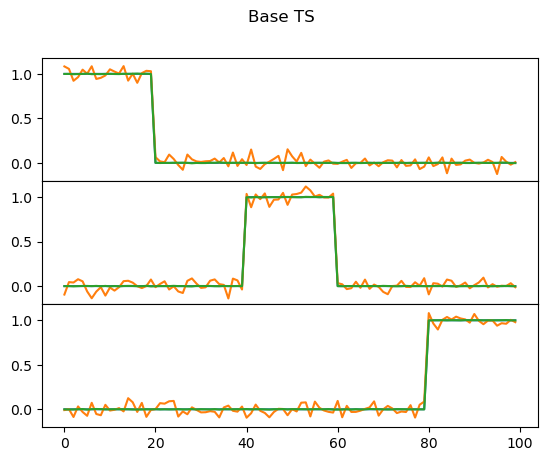

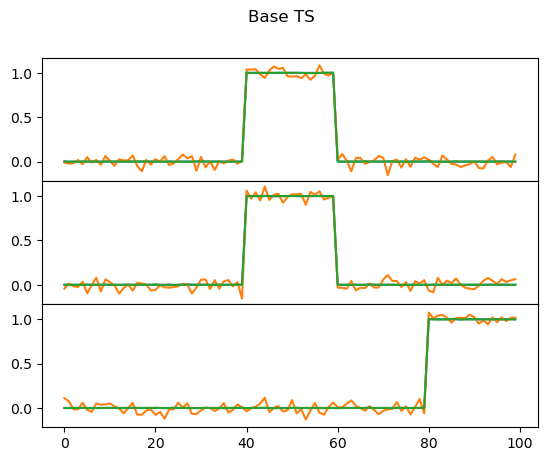

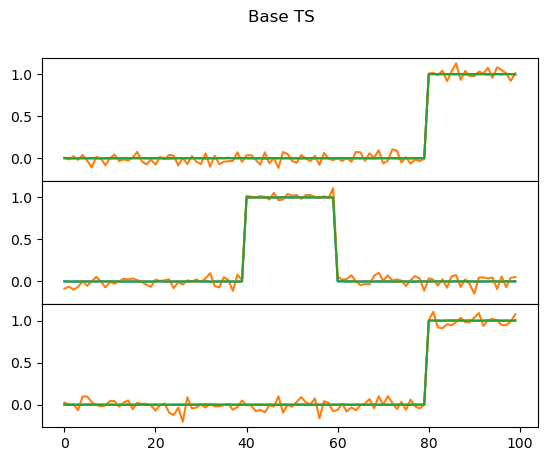

In [13]:
fig = plt.figure(n_var)
gs = fig.add_gridspec(n_var,hspace=0)
axs = gs.subplots(sharey=True)
plt.suptitle("Base TS")
for i in range(n_var):
    axs[i].plot(base_ts[i])
    axs[i].plot(base_dataset[0, i])
    axs[i].plot(np.mean(base_dataset[:, i], axis=0))
plt.show()

fig = plt.figure(n_var)
gs = fig.add_gridspec(n_var,hspace=0)
axs = gs.subplots(sharey=True)
plt.suptitle("Base TS")
for i in range(n_var):
    axs[i].plot(base_two_ts[i])
    axs[i].plot(base_two_dataset[0, i])
    axs[i].plot(np.mean(base_two_dataset[:, i], axis=0))
plt.show()

fig = plt.figure(n_var)
gs = fig.add_gridspec(n_var,hspace=0)
axs = gs.subplots(sharey=True)
plt.suptitle("Base TS")
for i in range(n_var):
    axs[i].plot(base_three_ts[i])
    axs[i].plot(base_three_dataset[0, i])
    axs[i].plot(np.mean(base_three_dataset[:, i], axis=0))
plt.show()

In [ ]:
fig = plt.figure(n_var)
gs = fig.add_gridspec(n_var,hspace=0)
axs = gs.subplots(sharey=True)
plt.suptitle("Base TS")
for i in range(n_var):
    #axs[i].plot(base_ts[i])
    #axs[i].plot(base_dataset[0, i])
    axs[i].plot(np.mean(base_dataset[:, i], axis=0))
plt.show()

"""
fig = plt.figure(n_var)
gs = fig.add_gridspec(n_var,hspace=0)
axs = gs.subplots(sharey=True)
plt.suptitle("Base TS")
for i in range(n_var):
    axs[i].plot(base_two_ts[i])
    #axs[i].plot(base_two_dataset[0, i])
    axs[i].plot(np.mean(base_two_dataset[:, i], axis=0))
plt.show()

fig = plt.figure(n_var)
gs = fig.add_gridspec(n_var,hspace=0)
axs = gs.subplots(sharey=True)
plt.suptitle("Base TS")
for i in range(n_var):
    axs[i].plot(base_three_ts[i])
    axs[i].plot(base_three_dataset[0, i])
    axs[i].plot(np.mean(base_three_dataset[:, i], axis=0))
plt.show()
"""

In [10]:
n_samples = 4000
n_var = 3
n_timesteps = 100

base_ts = np.zeros((n_var,n_timesteps))
base_ts[0, 0:5] = 0.5
base_ts[1, 20:25] = 1
base_ts[2, 40:45] = 1

base_dataset = np.zeros((n_samples, n_var, n_timesteps))
base_dataset_label = np.zeros((n_samples))
for i in range(n_samples):
    base_dataset[i] = base_ts + np.random.normal(0, 0.05, (n_var, n_timesteps))

base_two_ts = np.zeros((n_var,n_timesteps))
base_two_ts[0, 0:5] = 0.5
base_two_ts[1, 20:25] = 1
base_two_ts[2, 40:45] = 1

base_two_dataset = np.zeros((n_samples, n_var, n_timesteps))
base_two_dataset_label = np.ones((n_samples))
for i in range(n_samples):
    base_two_dataset[i] = base_two_ts + np.random.normal(0, 0.05, (n_var, n_timesteps))

base_three_ts = np.zeros((n_var, n_timesteps))
base_three_ts[0, 0:5] = 0.2
base_three_ts[1, 20:25] = 1
base_three_ts[2, 40:45] = 1

base_three_dataset = np.zeros((n_samples, n_var, n_timesteps))
base_three_dataset_label = np.ones((n_samples)) * 2
for i in range(n_samples):
    base_three_dataset[i] = base_three_ts + np.random.normal(0, 0.05, (n_var, n_timesteps))

dataset = np.concatenate((base_dataset, base_two_dataset, base_three_dataset), axis=0)
dataset_label = np.concatenate((base_dataset_label, base_two_dataset_label, base_three_dataset_label), axis=0)

#Suffle dataset
dataset, dataset_label = shuffle(dataset, dataset_label)
X_train = dataset[:int(n_samples*3*0.6)]
y_train = dataset_label[:int(n_samples*3*0.6)]
X_val = dataset[int(n_samples*3*0.6):int(n_samples*3*0.8)]
y_val = dataset_label[int(n_samples*3*0.6):int(n_samples*3*0.8)]
X_test = dataset[int(n_samples*3*0.8):]
y_test = dataset_label[int(n_samples*3*0.8):]

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

np.save('data/Dirac3/x_train_2020.npy', X_train)
np.save('data/Dirac3/y_train_2020.npy', y_train)
np.save('data/Dirac3/x_valid_2020.npy', X_val)
np.save('data/Dirac3/y_valid_2020.npy', y_val)
np.save('data/Dirac3/x_test_2020.npy', X_test)
np.save('data/Dirac3/y_test_2020.npy', y_test)

(7200, 3, 100) (7200,)
(2400, 3, 100) (2400,)
(2400, 3, 100) (2400,)


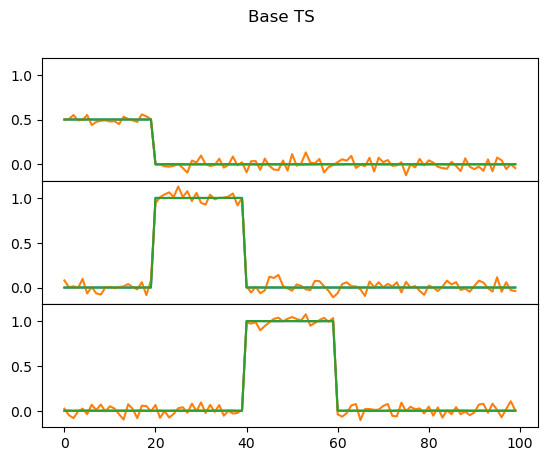

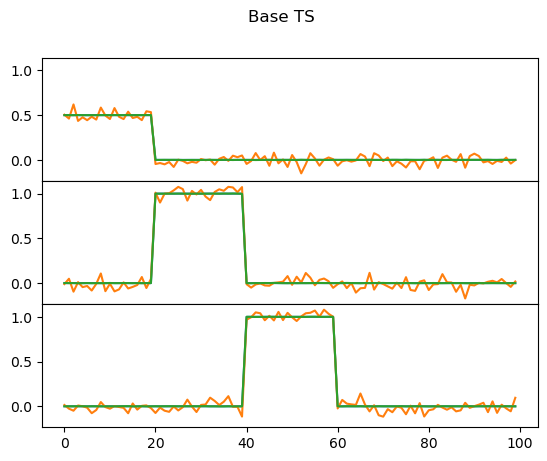

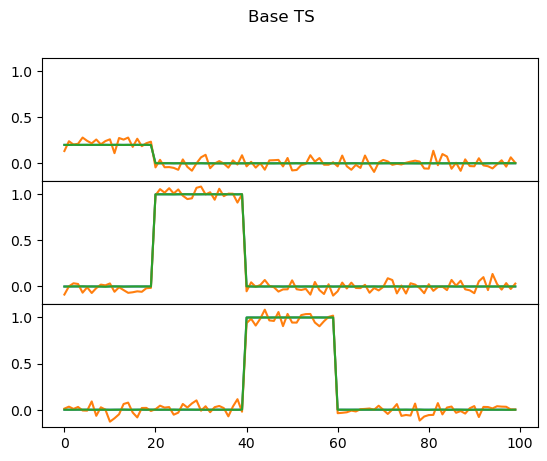

In [11]:
fig = plt.figure(n_var)
gs = fig.add_gridspec(n_var,hspace=0)
axs = gs.subplots(sharey=True)
plt.suptitle("Base TS")
for i in range(n_var):
    axs[i].plot(base_ts[i])
    axs[i].plot(base_dataset[0, i])
    axs[i].plot(np.mean(base_dataset[:, i], axis=0))
plt.show()

fig = plt.figure(n_var)
gs = fig.add_gridspec(n_var,hspace=0)
axs = gs.subplots(sharey=True)
plt.suptitle("Base TS")
for i in range(n_var):
    axs[i].plot(base_two_ts[i])
    axs[i].plot(base_two_dataset[0, i])
    axs[i].plot(np.mean(base_two_dataset[:, i], axis=0))
plt.show()

fig = plt.figure(n_var)
gs = fig.add_gridspec(n_var,hspace=0)
axs = gs.subplots(sharey=True)
plt.suptitle("Base TS")
for i in range(n_var):
    axs[i].plot(base_three_ts[i])
    axs[i].plot(base_three_dataset[0, i])
    axs[i].plot(np.mean(base_three_dataset[:, i], axis=0))
plt.show()

In [12]:
import pandas as pd
import numpy as np
import pickle

def load_cured_data(path, ctype):
    X = np.load(f'{path}/compressed_X.npz')['a']
    Y = pd.read_csv(f'{path}/Y.csv')
    target_y = np.load(f'{path}/y_{ctype}.npy')
    return X, Y, target_y


def split_ptb(X, Y, target_y, test_fold):
    # Train
    X_train = X[np.where(Y.strat_fold != test_fold)]
    Y_train = target_y[np.where(Y.strat_fold != test_fold)]

    # Test
    X_test = X[np.where(Y.strat_fold == test_fold)]
    Y_test = target_y[np.where(Y.strat_fold == test_fold)]

    assert X_train.shape[0] == Y_train.shape[0], "X_train and Y_train should be the same size"
    assert X_test.shape[0] == Y_test.shape[0], "X_test and Y_test should be the same size"

    return X_train, Y_train, X_test, Y_test


In [22]:
dataset_path = "data/ECG/processed"
ctype = "superdiagnostic"
test_fold = 10

X, Y, target_y = load_cured_data(dataset_path, ctype)
X_train, Y_train_ohe, X_test, Y_test_ohe = split_ptb(X, Y, target_y, test_fold)
Y_train = np.argmax(Y_train_ohe, axis=1)
Y_test = np.argmax(Y_test_ohe, axis=1)
print(X.shape, Y.shape, target_y.shape)
print(X_train.shape, Y_train_ohe.shape, Y_train.shape, X_test.shape, Y_test_ohe.shape, Y_test.shape)

X_val = X_train[int(X_train.shape[0]*0.8):]
Y_val = Y_train[int(Y_train.shape[0]*0.8):]
X_train = X_train[:int(X_train.shape[0]*0.8)]
Y_train = Y_train[:int(Y_train.shape[0]*0.8)]
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape)
np.save('data/ECG/x_train_2020.npy', X_train)
np.save('data/ECG/y_train_2020.npy', Y_train)
np.save('data/ECG/x_valid_2020.npy', X_val)
np.save('data/ECG/y_valid_2020.npy', Y_val)
np.save('data/ECG/x_test_2020.npy', X_test)
np.save('data/ECG/y_test_2020.npy', Y_test)

(21430, 12, 1000) (21430, 28) (21430, 5)
(19267, 12, 1000) (19267, 5) (19267,) (2163, 12, 1000) (2163, 5) (2163,)
(15413, 12, 1000) (15413,) (3854, 12, 1000) (3854,) (2163, 12, 1000) (2163,)
